<a href="https://colab.research.google.com/github/MilitelloN/AprendizajeDeMaquina/blob/main/PreProcesamiento_Clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
from scipy.io import arff

# Cargar el archivo ARFF
data, meta = arff.loadarff("/content/PhishingWebsitesClassificationDataset.arff")
df = pd.DataFrame(data)

# Convertir byte-strings a enteros
df_clean = df.map(lambda x: int(x.decode("utf-8")) if isinstance(x, bytes) else x)

# Identificar columnas categóricas (todas lo son)
categorical_vars = df_clean.select_dtypes(include="int").columns.tolist()
numerical_vars = []  # No hay variables continuas

# Verificar valores únicos
for col in categorical_vars:
    print(f"{col}: {df_clean[col].unique()}")

having_IP_Address: [-1  1]
URL_Length: [ 1  0 -1]
Shortining_Service: [ 1 -1]
having_At_Symbol: [ 1 -1]
double_slash_redirecting: [-1  1]
Prefix_Suffix: [-1  1]
having_Sub_Domain: [-1  0  1]
SSLfinal_State: [-1  1  0]
Domain_registeration_length: [-1  1]
Favicon: [ 1 -1]
port: [ 1 -1]
HTTPS_token: [-1  1]
Request_URL: [ 1 -1]
URL_of_Anchor: [-1  0  1]
Links_in_tags: [ 1 -1  0]
SFH: [-1  1  0]
Submitting_to_email: [-1  1]
Abnormal_URL: [-1  1]
Redirect: [0 1]
on_mouseover: [ 1 -1]
RightClick: [ 1 -1]
popUpWidnow: [ 1 -1]
Iframe: [ 1 -1]
age_of_domain: [-1  1]
DNSRecord: [-1  1]
web_traffic: [-1  0  1]
Page_Rank: [-1  1]
Google_Index: [ 1 -1]
Links_pointing_to_page: [ 1  0 -1]
Statistical_report: [-1  1]
Result: [-1  1]


Visualizacion de datos y valores que puede tener cada columna

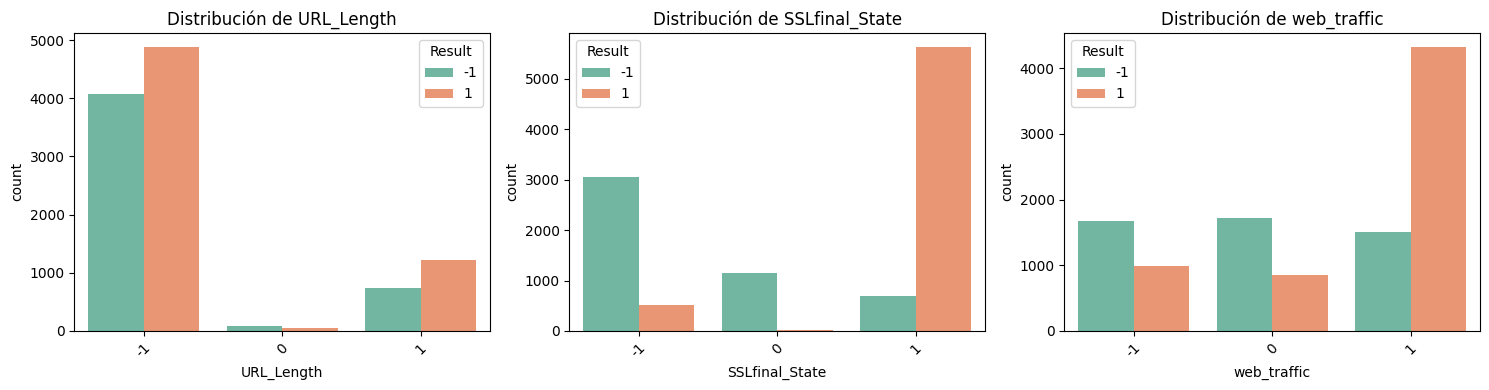

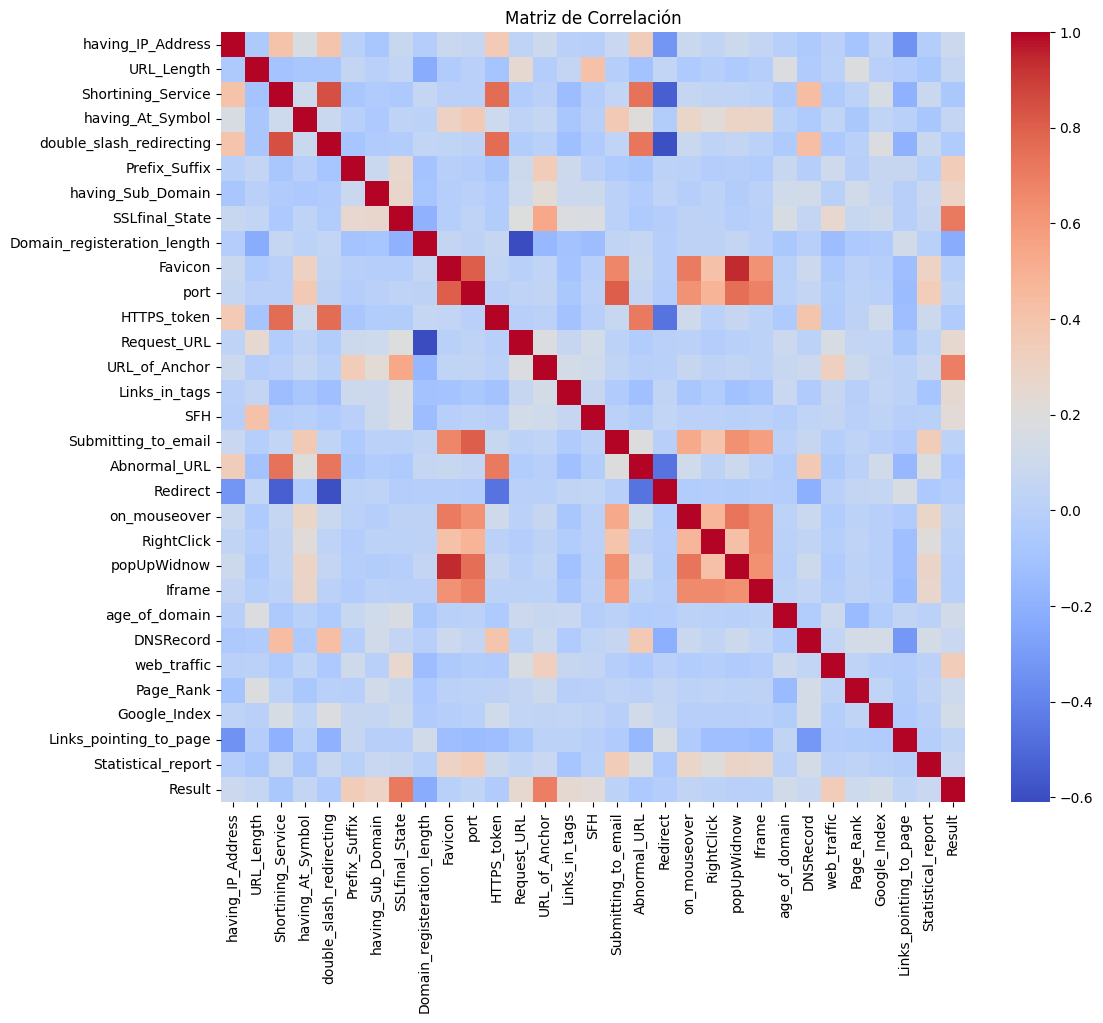

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Función para graficar distribución de variables
def plot_distributions(dataframe, cols, target='Result', n_cols=3):
    n_rows = int(np.ceil(len(cols) / n_cols))
    plt.figure(figsize=(n_cols * 5, n_rows * 4))
    for i, col in enumerate(cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.countplot(data=dataframe, x=col, hue=target, palette='Set2')
        plt.title(f'Distribución de {col}')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Ejemplo de uso
selected_columns = ['URL_Length', 'SSLfinal_State', 'web_traffic', 'Result']
plot_distributions(df_clean, selected_columns[:-1], target='Result')

# Matriz de correlación (entre valores -1, 0, 1)
plt.figure(figsize=(12, 10))
sns.heatmap(df_clean.corr(), cmap='coolwarm', annot=False)
plt.title("Matriz de Correlación")
plt.show()

In [6]:
# Verificar valores faltantes
missing_data = df_clean.isnull().sum()
print("Valores faltantes:\n", missing_data[missing_data > 0])

# Verificar outliers (valores fuera de -1, 0, 1)
outliers_check = {
    col: df_clean[~df_clean[col].isin([-1, 0, 1])][col].unique()
    for col in categorical_vars
}
outliers = {k: v.tolist() for k, v in outliers_check.items() if len(v) > 0}
print("Outliers encontrados:\n", outliers)

# Tratamiento de datos faltantes (no hay en este dataset, pero ejemplo)
df_final = df_clean.dropna()

# Verificar integridad post-tratamiento
print("Forma final del dataset:", df_final.shape)

Valores faltantes:
 Series([], dtype: int64)
Outliers encontrados:
 {}
Forma final del dataset: (11055, 31)
